<a href="https://colab.research.google.com/github/Geet-S/Hang-Gesture-Recognition-Model/blob/main/Project(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
#Importing all the basic needed libraries for the project.

In [ ]:
df = pd.read_csv('sign_mnist_train.csv')

# Step 2: Extract Features and Labels
X = df.drop(columns=['label'])  # Assuming 'label' column contains the class labels
y = df['label']

# Step 3: Reshape Features
X = np.array(X)  # Convert DataFrame to numpy array
X = X.reshape(-1, 28, 28, 1)  # Reshape to 28x28x1 for grayscale images

# Step 4: Normalize Pixel Values
X = X.astype('float32') / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Load data from a CSV file into a pandas DataFrame.
# Extract features and labels from the DataFrame.
# Reshape the features to match the required input shape for a convolutional neural network (CNN).
# Normalize the pixel values of the features to range between 0 and 1.
# Split the dataset into training and testing sets, with 80% of the data for training and 20% for testing.
# Random_state is fixed to a particular value - ensures that the random splitting of the data is reproducible.

In [ ]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(layers.Dense(26, activation='softmax'))  # Output layer with 26 nodes for each class

In [ ]:
# Create a Sequential model.
# Add the first convolutional layer with 32 filters, each of size 3x3, using ReLU activation, and input shape of 28x28x1.
# Add a max pooling layer to reduce spatial dimensions by half (2x2).
# Add the second convolutional layer with 64 filters, each of size 3x3, using ReLU activation.
# Add another max pooling layer to reduce spatial dimensions by half (2x2).
# Flatten the output of convolutional layers to prepare for fully connected layers.
# Add a fully connected layer with 128 neurons using ReLU activation.
# Add a dropout layer to prevent overfitting by randomly setting 20% of the input units to 0 during training.
# Add the output layer with 26 nodes (one for each class) using softmax activation for multi-class classification.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Compile the model with Adam optimizer for training.
# Use sparse categorical crossentropy loss function for multi-class classification tasks.
# Track accuracy metric during training to evaluate model performance.

#Adam optimizer adapts learning rates for each parameter individually.
#and sparse categorical crossentropy loss function is used for multi-class classification where the target labels are integers.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


687/687 [==============================] - 11s 12ms/step - loss: 1.1227 - accuracy: 0.6564 - val_loss: 0.1971 - val_accuracy: 0.9512
Epoch 2/10
687/687 [==============================] - 8s 11ms/step - loss: 0.1739 - accuracy: 0.9484 - val_loss: 0.0313 - val_accuracy: 0.9949
Epoch 3/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0098 - val_accuracy: 0.9996
Epoch 4/10
687/687 [==============================] - 9s 13ms/step - loss: 0.0409 - accuracy: 0.9883 - val_loss: 0.0060 - val_accuracy: 0.9991
Epoch 5/10
687/687 [==============================] - 9s 12ms/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 10s 15ms/step - loss: 0.0212 - accuracy: 0.9943 - val_loss: 0.0088 - val_accuracy: 0.9989
Epoch 7/10
687/687 [==============================] - 9s 13ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0011 - val_accuracy: 1.

In [ ]:
# Train the model on the training data (features X_train and labels y_train) for 10 epochs.
# Validate the model's performance on the testing data (features X_test and labels y_test) after each epoch.

#Overfitting can occur if the training loss continues to decrease while the validation loss starts to
#increase or if the training accuracy is much higher than the validation accuracy, indicating poor generalization.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

172/172 [==============================] - 1s 3ms/step - loss: 0.0149 - accuracy: 0.9934


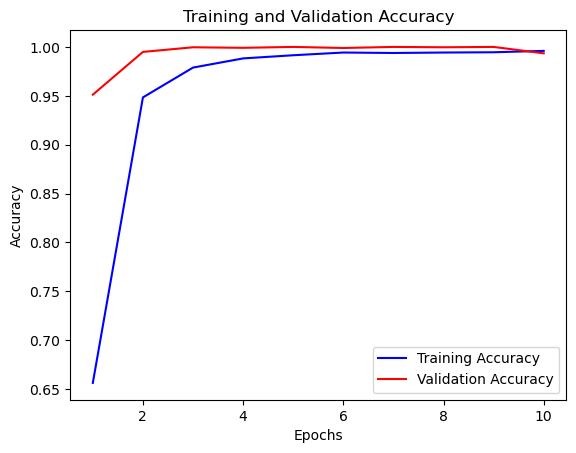

In [ ]:
import matplotlib.pyplot as plt

# Extract training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

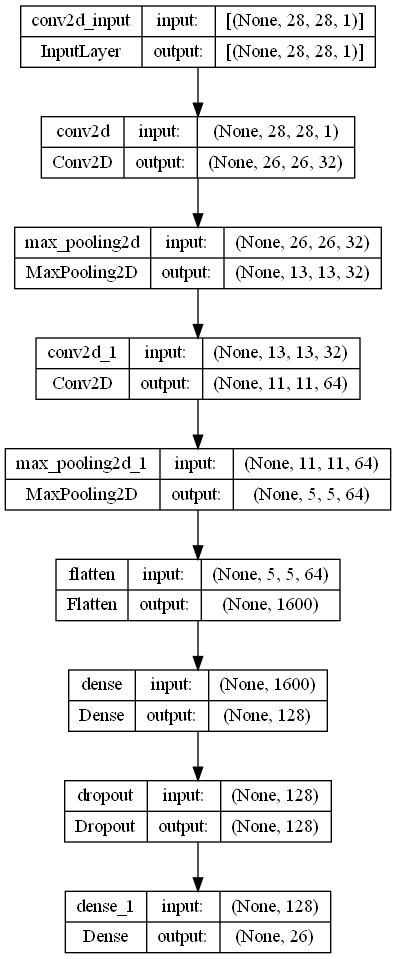

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Observations:
1)Write your observations on Overfitting issues in this project.

The difference between the training and validation accuracies is quite significant,
with the validation accuracy being higher than the training accuracy.
This shows that the model is not generalizing well to unseen values and indicates overfitting.


2) Will the Overfitting further reduce if you use another dropout layer (say with rate
0.3) after the Convolution layers?

Yes, adding another dropout layer with a rate of 0.3 would help reduce overfitting.
This would encourage the model to learn more diverse representations of input and can improve generalization.


3) How has the project handled Share Structure property and invariance property?

The filters used in CNNs are shared across different spatial locations of the input image, which exploits the share structure property.
By sharing parameters, the model can learn to detect the same feature regardless of its location in the image
Max pooling used in the project retains the maximum value within a sliding window, effectively capturing the most salient feature in that region.
This helps the model become invariant to small translations or shifts in the input data. This helps capture the most important features of the image
and reduces sensitivity to location of the image.
